In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Faiq1\Desktop\listings.csv")

In [3]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20230309202119,2023-03-09,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.90
1,311124,https://www.airbnb.com/rooms/311124,20230309202119,2023-03-10,city scrape,*historic centre* *bright* *canal view* *jordaan*,> Please be so kind to book ONLY AFTER conta...,Perfect location in the lively centre. All his...,https://a0.muscache.com/pictures/5208672/5bb60...,1600010,...,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,1,1,0,0,0.66
2,319985,https://www.airbnb.com/rooms/319985,20230309202119,2023-03-10,city scrape,Elegant Appartement Central Location.,"From December 26 thru January 2, minimum stay ...",Bij aankomst vertel ik mijn gasten graag over ...,https://a0.muscache.com/pictures/3b76222e-ed0a...,1640702,...,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,2,1,1,0,3.73
3,327285,https://www.airbnb.com/rooms/327285,20230309202119,2023-03-10,city scrape,beautiful designed ap.+bikes+garden,Cosy and comfortable apartment on the ground f...,'De Pijp' as we Amsterdammers know it today is...,https://a0.muscache.com/pictures/4283713/63eaa...,1672823,...,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,2,0,2,0,4.19
4,331946,https://www.airbnb.com/rooms/331946,20230309202119,2023-03-10,previous scrape,Lovely FAMILY house near Vondelpark,* Our house is only suitable for a couple or f...,NaN,https://a0.muscache.com/pictures/b73c16af-4e31...,1687595,...,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,1,1,0,0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,842462220391708128,https://www.airbnb.com/rooms/842462220391708128,20230309202119,2023-03-10,city scrape,Flat in the center of Amsterdam,Our place is the really best place you can pic...,"Stay in the middle of Amsterdam. Bikes around,...",https://a0.muscache.com/pictures/miso/Hosting-...,47205615,...,NaN,NaN,NaN,0363 80A2 E913 8FAD A98A,f,1,1,0,0,NaN
6994,842493348876281257,https://www.airbnb.com/rooms/842493348876281257,20230309202119,2023-03-09,city scrape,3bed ark close to city centre,"At NDSM, the arty heart of the city, you can f...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,454835217,...,NaN,NaN,NaN,0363 B755 6BD8 6F8D AA7F,t,1,1,0,0,NaN
6995,842634905680862660,https://www.airbnb.com/rooms/842634905680862660,20230309202119,2023-03-10,city scrape,ground floor studio 46m2 at boulevard & canal,Studio in a newly build house. Entrance at the...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,504448710,...,NaN,NaN,NaN,0363 76A0 B46B 281A C38E,f,1,1,0,0,NaN
6996,842713539293550316,https://www.airbnb.com/rooms/842713539293550316,20230309202119,2023-03-09,city scrape,Oasis in trendy Amsterdam East,"Design appartement met fijne tuin, in een van ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,17537276,...,NaN,NaN,NaN,0363 97C2 71FF 5383 DC95,f,1,1,0,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6998 non-null   int64  
 1   listing_url                                   6998 non-null   object 
 2   scrape_id                                     6998 non-null   int64  
 3   last_scraped                                  6998 non-null   object 
 4   source                                        6998 non-null   object 
 5   name                                          6998 non-null   object 
 6   description                                   6992 non-null   object 
 7   neighborhood_overview                         4506 non-null   object 
 8   picture_url                                   6998 non-null   object 
 9   host_id                                       6998 non-null   i

In [5]:
df['listing_url'].count()

6998

In [6]:
df['host_location']

0       Amsterdam, Netherlands
1       Amsterdam, Netherlands
2       Amsterdam, Netherlands
3       Amsterdam, Netherlands
4       Amsterdam, Netherlands
                 ...          
6993    Amsterdam, Netherlands
6994                       NaN
6995                       NaN
6996    Amsterdam, Netherlands
6997         San Francisco, CA
Name: host_location, Length: 6998, dtype: object

In [7]:
df[['host_city', 'host_country']] = df['host_location'].str.split(', ', expand = True)

In [8]:
df.groupby('host_country')['host_country'].count().sort_values(ascending = False).head(5)

host_country
Netherlands       5838
United Kingdom      22
Germany             11
Belgium             10
NY                  10
Name: host_country, dtype: int64

In [9]:
df.groupby('host_response_time')['host_response_time'].count()

host_response_time
a few days or more     108
within a day          1083
within a few hours    1123
within an hour        2645
Name: host_response_time, dtype: int64

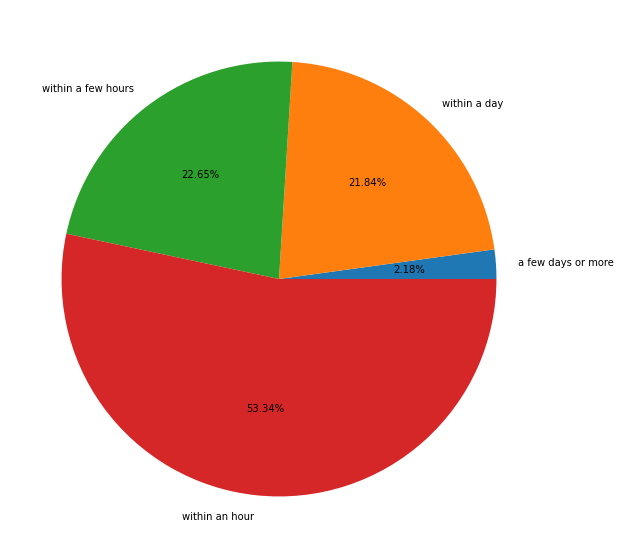

In [14]:
fig = plt.figure(figsize = (10,10))
plt.pie(df.groupby('host_response_time')['host_response_time'].count(), labels = df.groupby('host_response_time')['host_response_time'].count().index, autopct = "%1.2f%%")
plt.show()

In [15]:
df.groupby('host_country')['host_total_listings_count'].sum().sort_values(ascending = False).head(5)

host_country
Netherlands    22770
Portugal        2104
Switzerland      409
Denmark          233
Belgium           97
Name: host_total_listings_count, dtype: int64

In [17]:
df['price'] = df['price'].str.replace('$', '').str.replace(',','').astype(float)

In [20]:
df['price'].describe()

count    6998.000000
mean      223.038868
std       181.018460
min         0.000000
25%       130.000000
50%       186.000000
75%       270.000000
max      7900.000000
Name: price, dtype: float64

In [21]:
df['price'].aggregate([np.mean, np.std, np.median])

mean      223.038868
std       181.018460
median    186.000000
Name: price, dtype: float64

In [22]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    248.898913
Hotel room         177.322581
Private room       150.766495
Shared room        108.230769
Name: price, dtype: float64

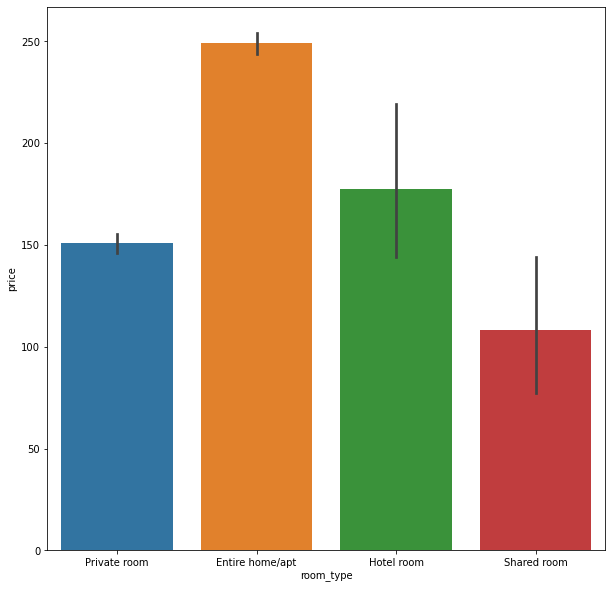

In [26]:
fig = plt.figure(figsize = (10,10))
sns.barplot(x = 'room_type',y = 'price', data = df)
plt.show()

In [27]:
df.groupby('room_type')['review_scores_value'].mean().sort_values(ascending = False)

room_type
Entire home/apt    4.657944
Private room       4.603453
Shared room        4.502222
Hotel room         4.459667
Name: review_scores_value, dtype: float64

<AxesSubplot:xlabel='room_type', ylabel='review_scores_value'>

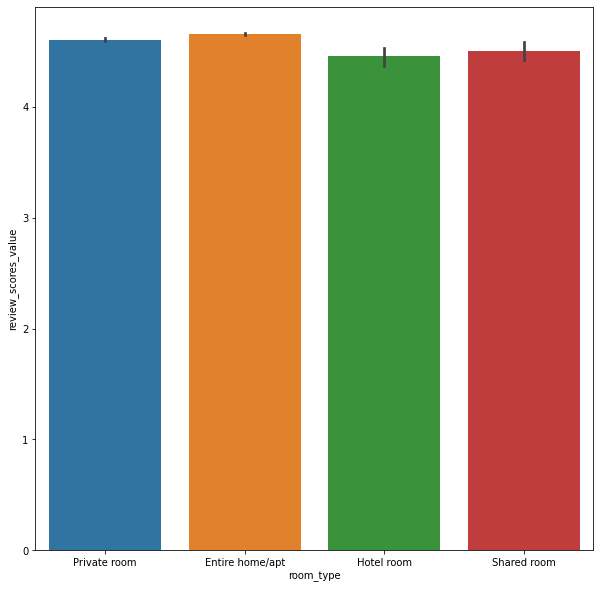

In [29]:
fig = plt.figure(figsize = (10,10))

sns.barplot(x = 'room_type', y = 'review_scores_value', data = df)

In [31]:
df.groupby('host_name')['reviews_per_month'].sum().sort_values(ascending = False).head(5)

host_name
Jean Paul                           186.11
Generator                           109.90
Bunk                                 84.96
Conscious Hotel The Tire Station     71.88
Marcel                               51.69
Name: reviews_per_month, dtype: float64

In [32]:
df['desc_length'] = df['description'].str.len()

In [34]:
df['desc_length']

0       1000.0
1       1000.0
2       1000.0
3       1000.0
4       1000.0
         ...  
6993     593.0
6994     559.0
6995     710.0
6996     561.0
6997     541.0
Name: desc_length, Length: 6998, dtype: float64

In [35]:
df[df['desc_length']>500]['description'].count()

5749

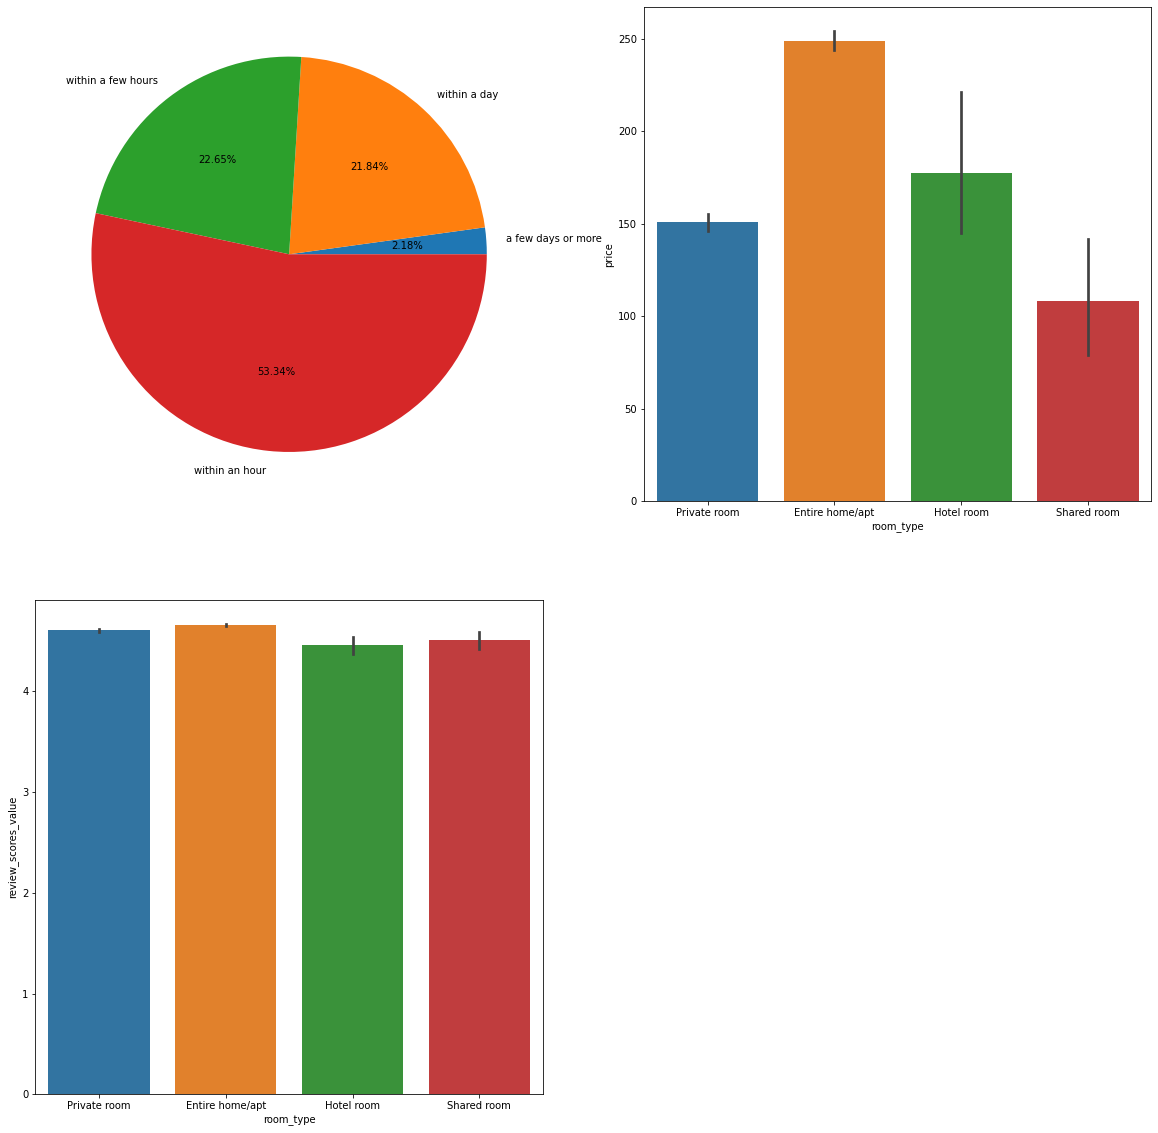

In [36]:
fig = plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.pie(df.groupby('host_response_time')['host_response_time'].count(), labels = df.groupby('host_response_time')['host_response_time'].count().index, autopct = "%1.2f%%")

plt.subplot(2,2,2)
sns.barplot(x = 'room_type',y = 'price', data = df)

plt.subplot(2,2,3)
sns.barplot(x = 'room_type', y = 'review_scores_value', data = df)

plt.show()